In [1]:
# Importing Libraries
#Operation on dataframe and numbers
import pandas as pd
import numpy as np
import os

#For plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

#sklearn
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.cluster import KMeans

In [2]:
#seting the folder where the data is saved
os.chdir("D:\Absenteeism Case Study")
os.getcwd()

'D:\\Absenteeism Case Study'

In [3]:
# Loading data
absenteism_data = pd.read_excel("Absenteeism_at_work.xls")

# Exploratory Data Analysis

In [4]:
# First 5 rows of data
absenteism_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [5]:
#Replacing the spaces between the variable names with underscore, as it's a good practise and help with model building
absenteism_data.columns = absenteism_data.columns.str.replace(' ', '_')

In [6]:
# Data Types of all the variables
absenteism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason_for_absence                 740 non-null int64
Month_of_absence                   740 non-null int64
Day_of_the_week                    740 non-null int64
Seasons                            740 non-null int64
Transportation_expense             740 non-null int64
Distance_from_Residence_to_Work    740 non-null int64
Service_time                       740 non-null int64
Age                                740 non-null int64
Work_load_Average/day_             740 non-null int64
Hit_target                         740 non-null int64
Disciplinary_failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social_drinker                     740 non-null int64
Social_smoker                      740 non-null int64
Pet                            

In [7]:
# Observations and Attributes of Dataset
absenteism_data.shape

(740, 21)

Some of the columns (“Absenteeism time in hours”, “Reason for absence” for example) have 0 as one of the values.Removing Observations with "Absenteeism time in hours" or "Reason for absence" equal to zero as it is invalid input.This dataset is about the absentees.if "Absenteeism time in hours" is 0 tells that they are not absent and it is invalid input

In [8]:
absenteism_data=absenteism_data.loc[absenteism_data['Absenteeism_time_in_hours']!=0,:]

In [9]:
absenteism_data.shape

(696, 21)


 Checking any missing values are there.There are no missing values

In [10]:
absenteism_data.isna().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

Add decimal points in thousands seperator of  column('Work_load_Average/day_') as per instructions

In [11]:
absenteism_data['Work_load_Average/day_']=absenteism_data['Work_load_Average/day_'].astype(str)
absenteism_data['Work_load_Average/day_']=absenteism_data['Work_load_Average/day_'].str[:3]+'.'+absenteism_data['Work_load_Average/day_'].str[3:]
absenteism_data['Work_load_Average/day_']=absenteism_data['Work_load_Average/day_'].astype(float)
absenteism_data.dtypes

ID                                   int64
Reason_for_absence                   int64
Month_of_absence                     int64
Day_of_the_week                      int64
Seasons                              int64
Transportation_expense               int64
Distance_from_Residence_to_Work      int64
Service_time                         int64
Age                                  int64
Work_load_Average/day_             float64
Hit_target                           int64
Disciplinary_failure                 int64
Education                            int64
Son                                  int64
Social_drinker                       int64
Social_smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body_mass_index                      int64
Absenteeism_time_in_hours            int64
dtype: object

In [12]:
# From the problem statement file categorising the variables in two category " Continuos" and "Categorical"
continuous_vars = ['Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average/day_', 'Transportation_expense',
       'Hit_target', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours']

categorical_vars = ['Reason_for_absence','Month_of_absence','Day_of_the_week',
                     'Seasons','Disciplinary_failure', 'Education', 'Social_drinker',
                     'Social_smoker', 'Pet', 'Son','ID']

# OutLier Analysis

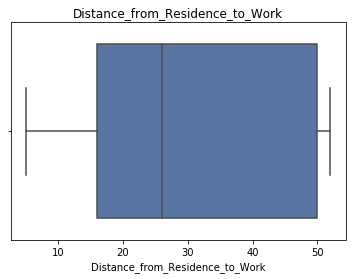

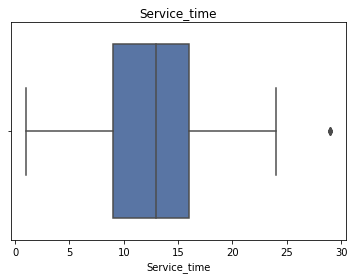

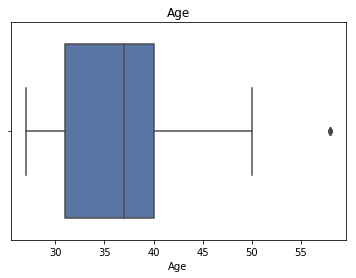

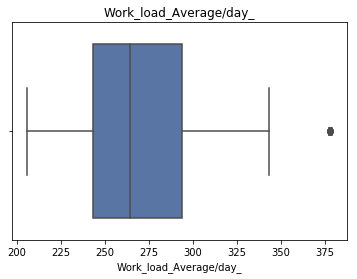

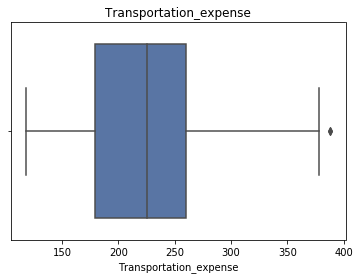

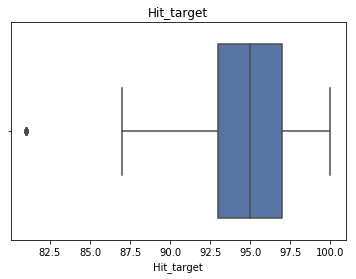

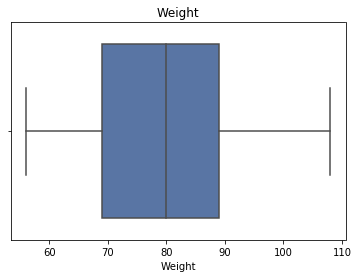

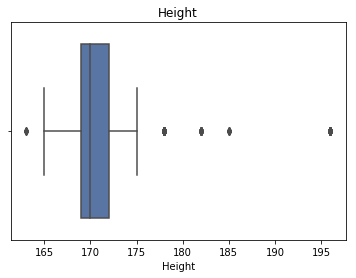

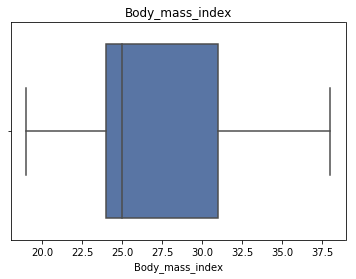

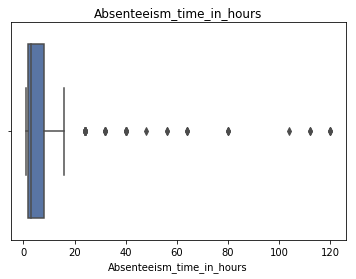

In [13]:
#Plot boxplot to visualize Outliers
for i in continuous_vars:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(absenteism_data[i],palette="deep")
    plt.title(i)
    plt.show()

 From the above boxplot we can clearly see that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index' there is no outlier

# Cappling Outliers

In [14]:
for i in continuous_vars:
    q75, q25 = np.percentile(absenteism_data.loc[:,i], [75,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5) 
    absenteism_data.loc[absenteism_data[i] < minn,i] = minn
    absenteism_data.loc[absenteism_data[i] > maxx,i] = maxx

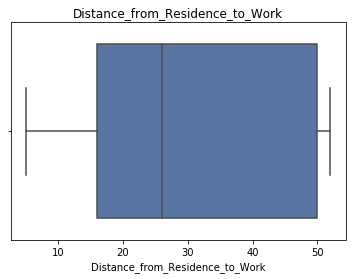

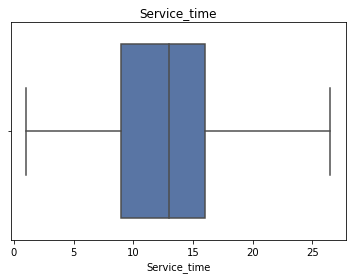

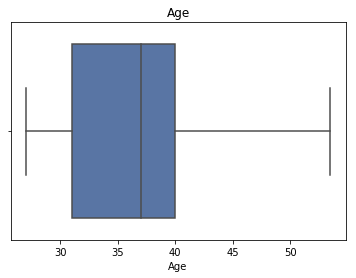

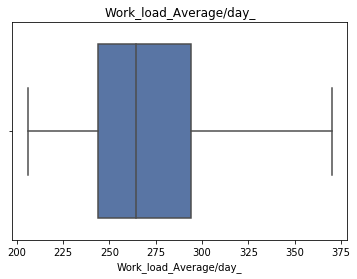

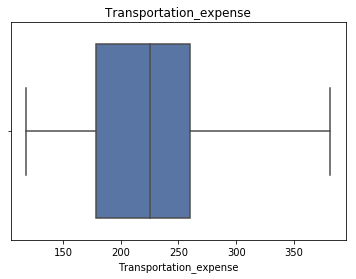

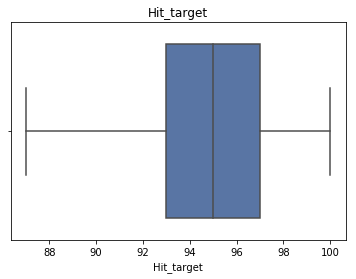

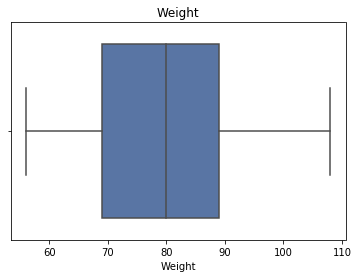

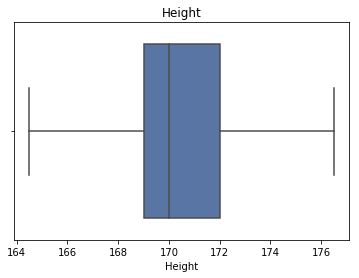

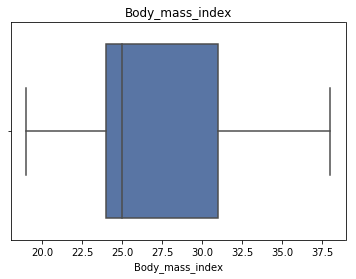

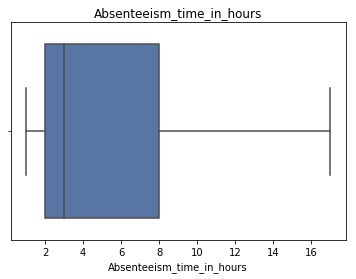

In [15]:
# Ploting BoxPlot of continuous variables after cappling the outliers and there are no outliers now
for i in continuous_vars:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(absenteism_data[i],palette="deep")
    plt.title(i)
    plt.show()


# Visualizing Data

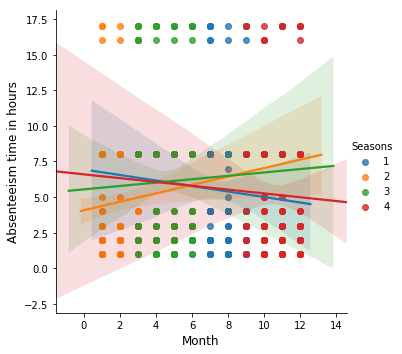

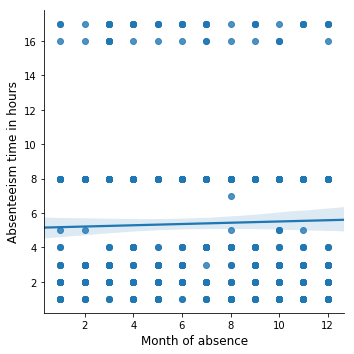

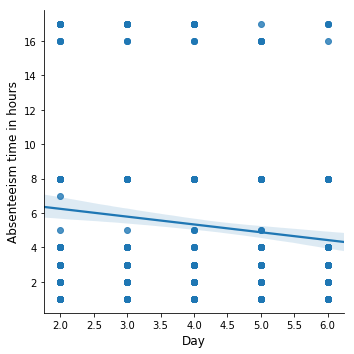

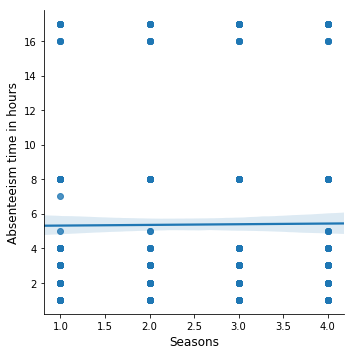

In [16]:
#Checking the trend of absent hours based on months

#line plot for absenteeism hours based on month of absence and categorised by seasons
#For ploting lm plot variables should be numeric not category
sns.lmplot(x = 'Month_of_absence', y = 'Absenteeism_time_in_hours', hue = 'Seasons', data =absenteism_data)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Absenteeism time in hours', fontsize=12)
plt.savefig('MSAbsenteeismhouts.png')

#Line for month of absence vs absenteeism time
sns.lmplot(x="Month_of_absence", y="Absenteeism_time_in_hours", data =absenteism_data)
plt.xlabel('Month of absence', fontsize=12)
plt.ylabel('Absenteeism time in hours', fontsize=12)
plt.savefig('Month1.png')

#line plot for day of week
sns.lmplot(x="Day_of_the_week", y="Absenteeism_time_in_hours", data =absenteism_data)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Absenteeism time in hours', fontsize=12)
plt.savefig('DOW.png')

#line plot for all weeks

sns.lmplot(x="Seasons", y="Absenteeism_time_in_hours", data =absenteism_data)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Absenteeism time in hours', fontsize=12)
plt.savefig('Seasons1.png')


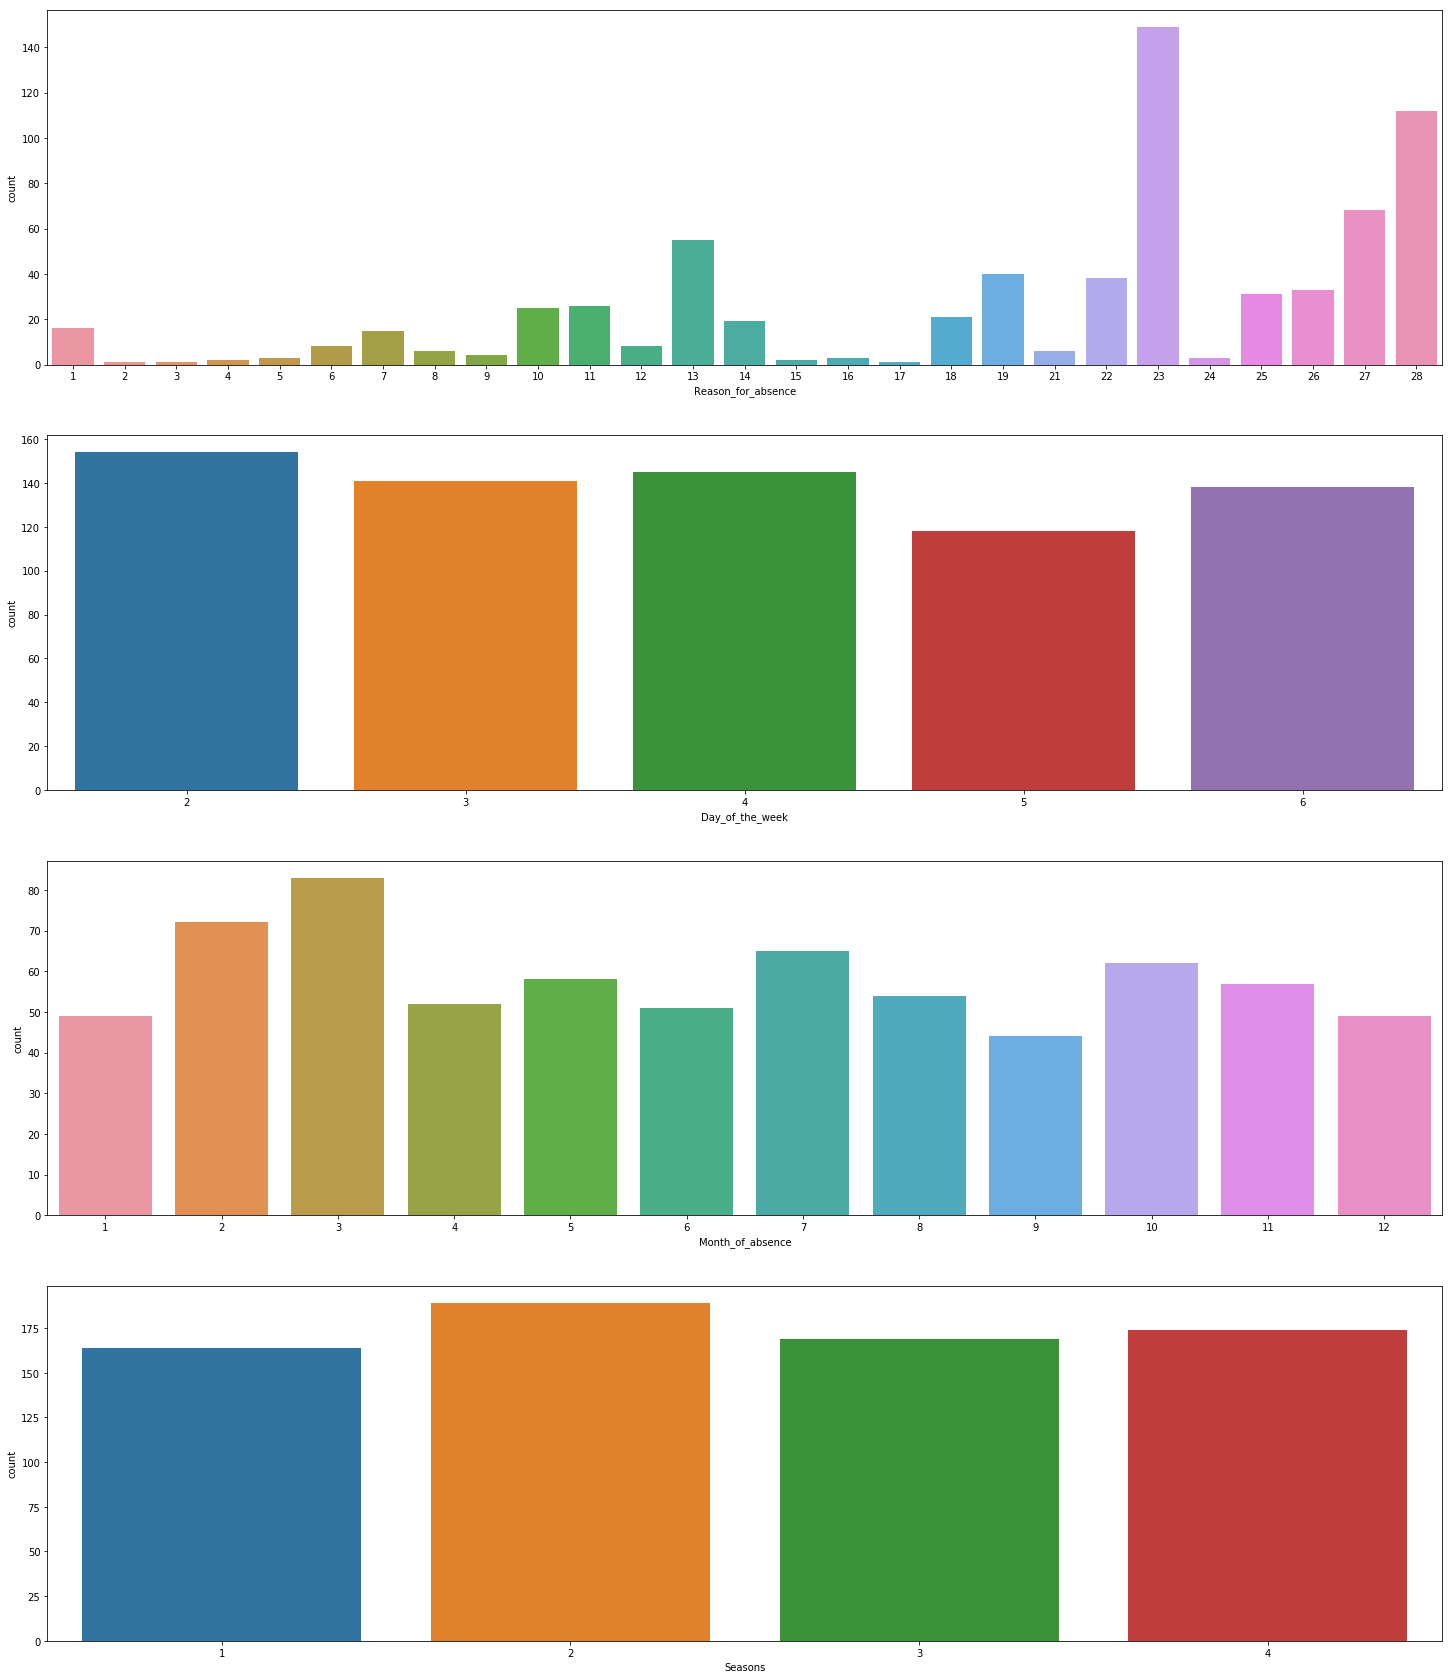

In [17]:
#Searborn - Countplots
#Univariate Analysis: Analysing single variable
#Countplot for reason for absence
plt.figure(figsize=(55,30))
gridspec.GridSpec(4,2)
plt.subplot2grid((4,2),(0,0))
sns.countplot(absenteism_data['Reason_for_absence'])
plt.savefig('ROA.png')

#Countplot for no of social smokers and drinkers
plt.subplot2grid((4,2),(1,0))
sns.countplot(absenteism_data['Day_of_the_week'])
plt.savefig('DOW.png')

#Countplot for based on month and season
plt.subplot2grid((4,2),(2,0))
sns.countplot(absenteism_data['Month_of_absence'])
plt.savefig('Month.png')

plt.subplot2grid((4,2),(3,0))
sns.countplot(absenteism_data['Seasons'])
plt.savefig('Seasons.png')


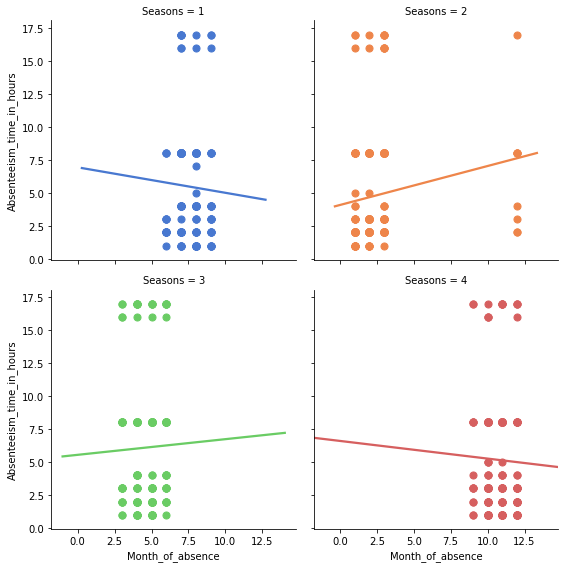

In [18]:
sns.lmplot(x="Month_of_absence", y="Absenteeism_time_in_hours", col="Seasons", hue="Seasons", data=absenteism_data,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [19]:
#Lets check what was the majorty reason for the absent hours
main_col = 'Reason_for_absence'
other_col = ['Social_drinker', 'Social_smoker']
corr_mat1 = []
for col in other_col[0:]:
    confusion_matrix = pd.crosstab(absenteism_data[main_col], absenteism_data[col])
    corr_mat1.append(confusion_matrix)
    
def highlight_min(x):
    is_max = x  == x.max()
    return['background: yellow' if v else '' for v in is_max]

out = pd.concat(corr_mat1, axis = 1, keys = other_col[0:])
out = out.style.apply(highlight_min, axis = 0)
out
#Cross tab is used when the categories for columns which we are comparing are same

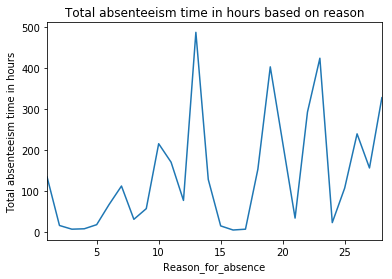

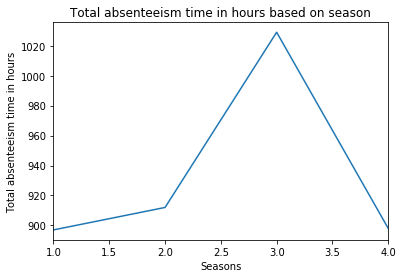

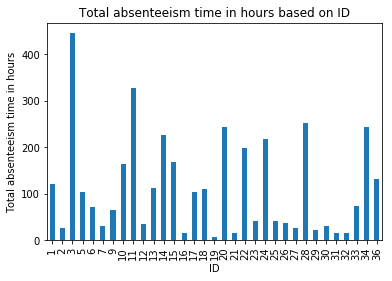

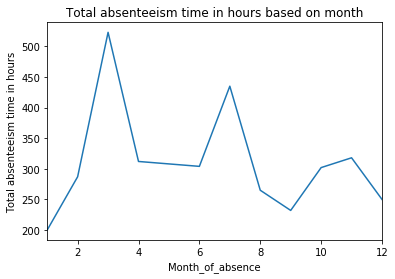

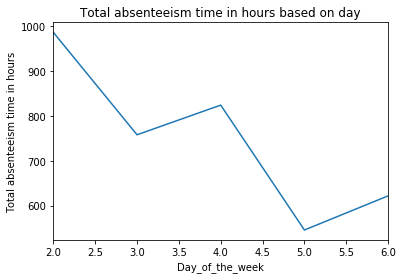

In [20]:
var = absenteism_data.groupby('Reason_for_absence')['Absenteeism_time_in_hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Reason for absence')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on reason") #Chart title
var.plot(kind='line')
plt.savefig('GP_ROA.png')

season_wise = absenteism_data.groupby('Seasons')['Absenteeism_time_in_hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Seasons')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on season") #Chart title
season_wise.plot(kind='line')
plt.savefig('GP_Seasons.png')

id_wise =absenteism_data.groupby('ID')['Absenteeism_time_in_hours'].sum().sort_index()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Seasons')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on ID") #Chart title
id_wise.plot(kind='bar')
plt.savefig('GP_ID.png')

#Total absent hours based on months
month_wise = absenteism_data.groupby('Month_of_absence')['Absenteeism_time_in_hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Month of absence')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on month") #Chart title
month_wise.plot(kind='line')
plt.savefig('GP_Month.png')

#Total absent hours based on days
day_wise =absenteism_data.groupby('Day_of_the_week')['Absenteeism_time_in_hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Day of the week')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on day") #Chart title
day_wise.plot(kind='line')
plt.savefig('GP_DOW.png')

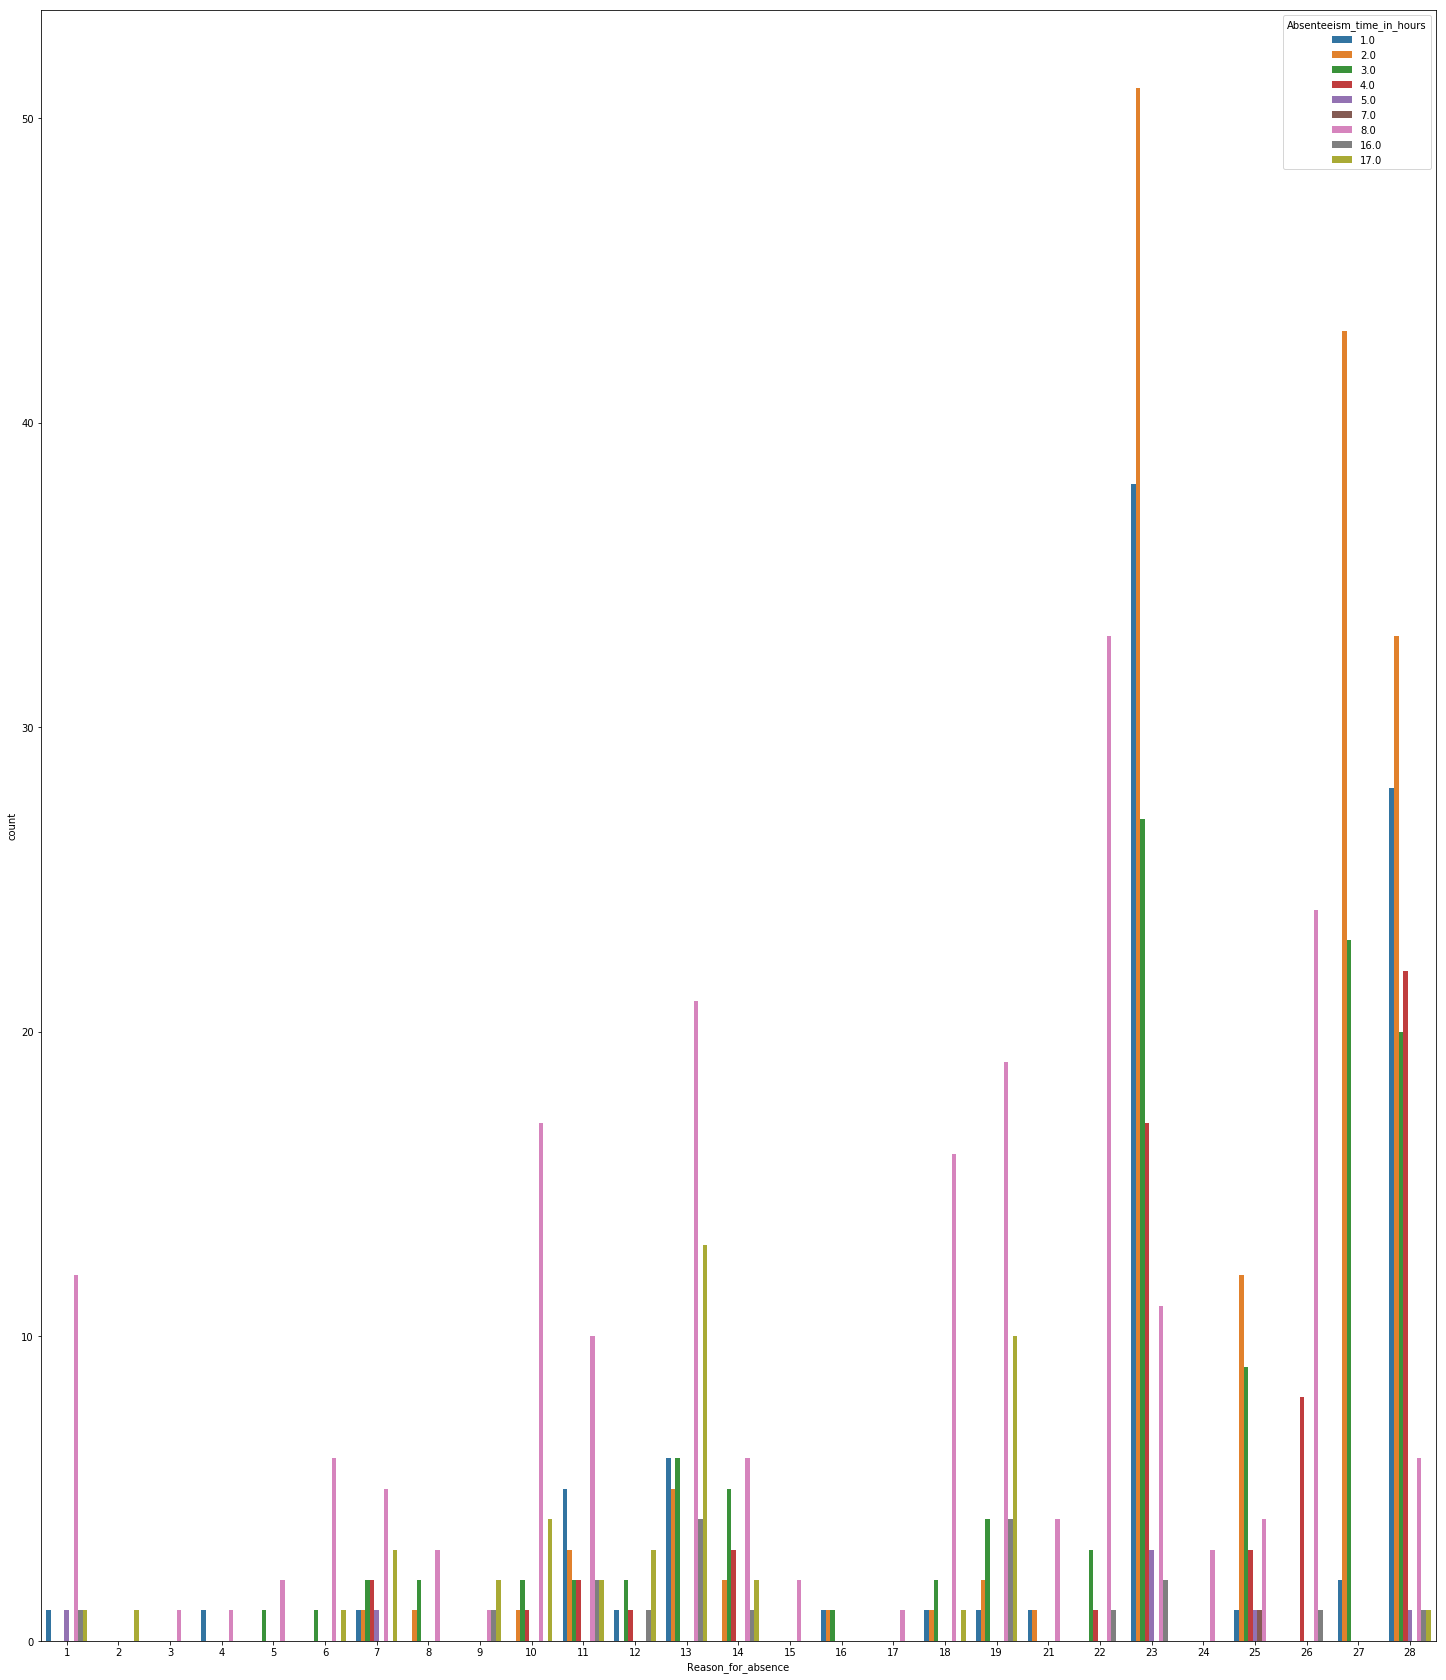

In [21]:
plt.figure(figsize=(25,30))
sns.countplot(x = 'Reason_for_absence', hue = 'Absenteeism_time_in_hours',data = absenteism_data)

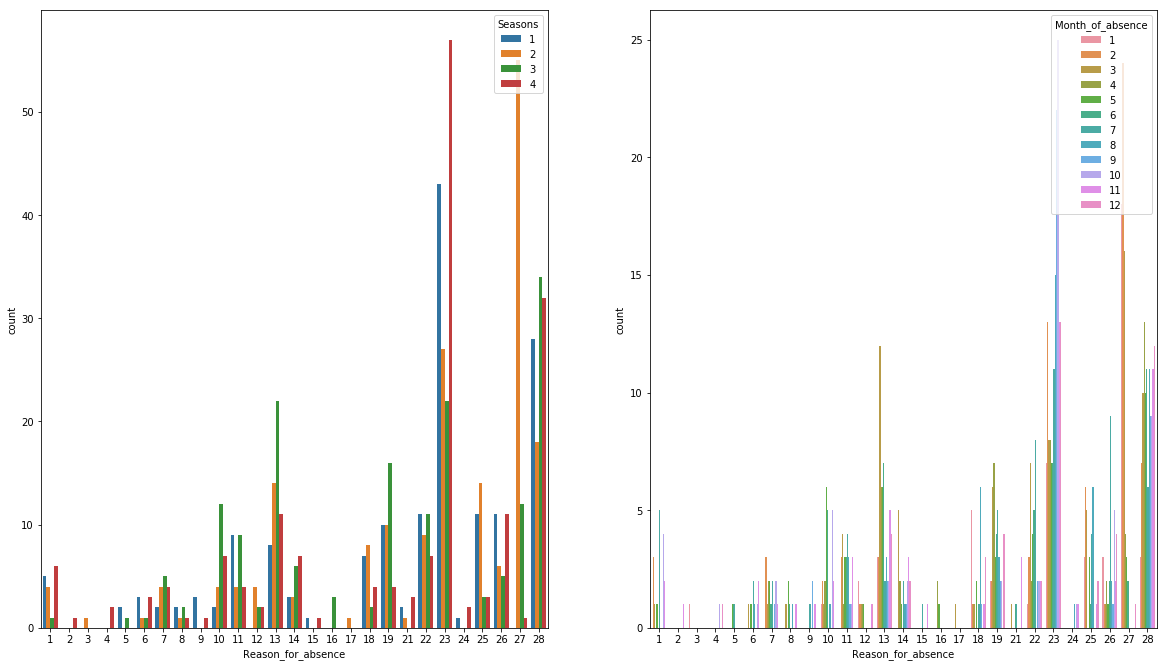

In [22]:
#Analysing multiple categorical variables together
#Checking the count reason for absence based on season

plt.figure(figsize=(20,25))
gridspec.GridSpec(2,2)
plt.subplot2grid((2,2),(0,0))
sns.countplot(x = 'Reason_for_absence', hue = 'Seasons', data = absenteism_data)
#Count of reason for absence based on month
plt.subplot2grid((2,2),(0,1))
sns.countplot(x = 'Reason_for_absence', hue = 'Month_of_absence', data = absenteism_data)

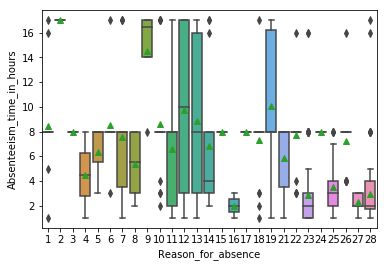

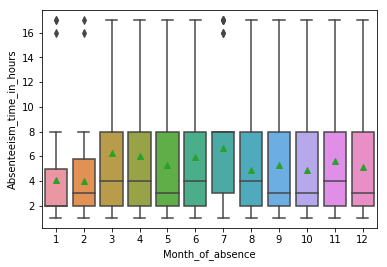

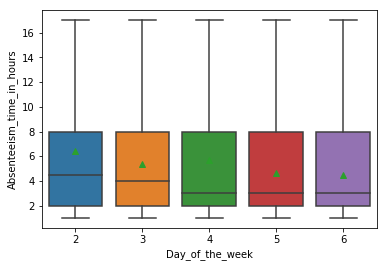

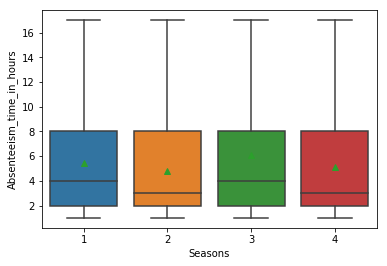

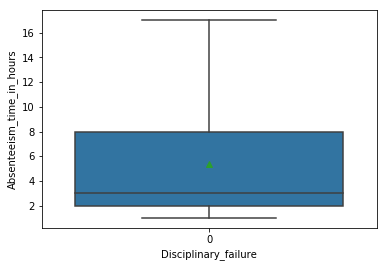

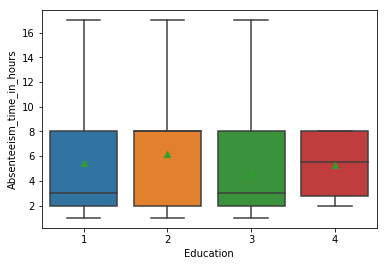

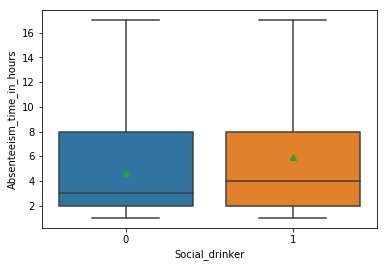

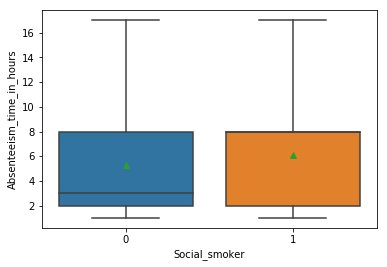

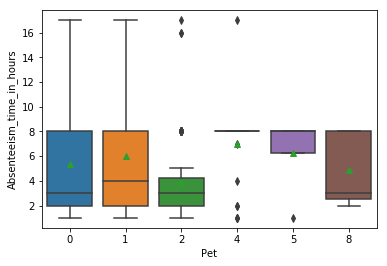

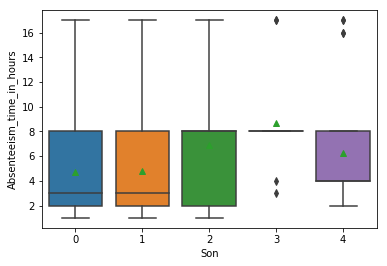

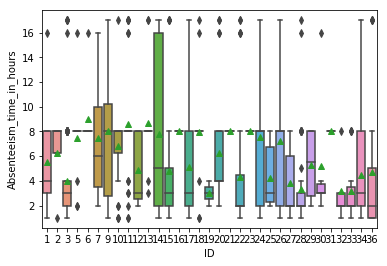

Reason_for_absence      None
Month_of_absence        None
Day_of_the_week         None
Seasons                 None
Disciplinary_failure    None
Education               None
Social_drinker          None
Social_smoker           None
Pet                     None
Son                     None
ID                      None
dtype: object

In [23]:
#Box plot between categorical independent and continuous dependent variables    
def box(col):
    sns.boxplot(x= col, y = absenteism_data['Absenteeism_time_in_hours'], showmeans=True)
    plt.show()
    
absenteism_data[categorical_vars].apply(box)

# Correlation Plot

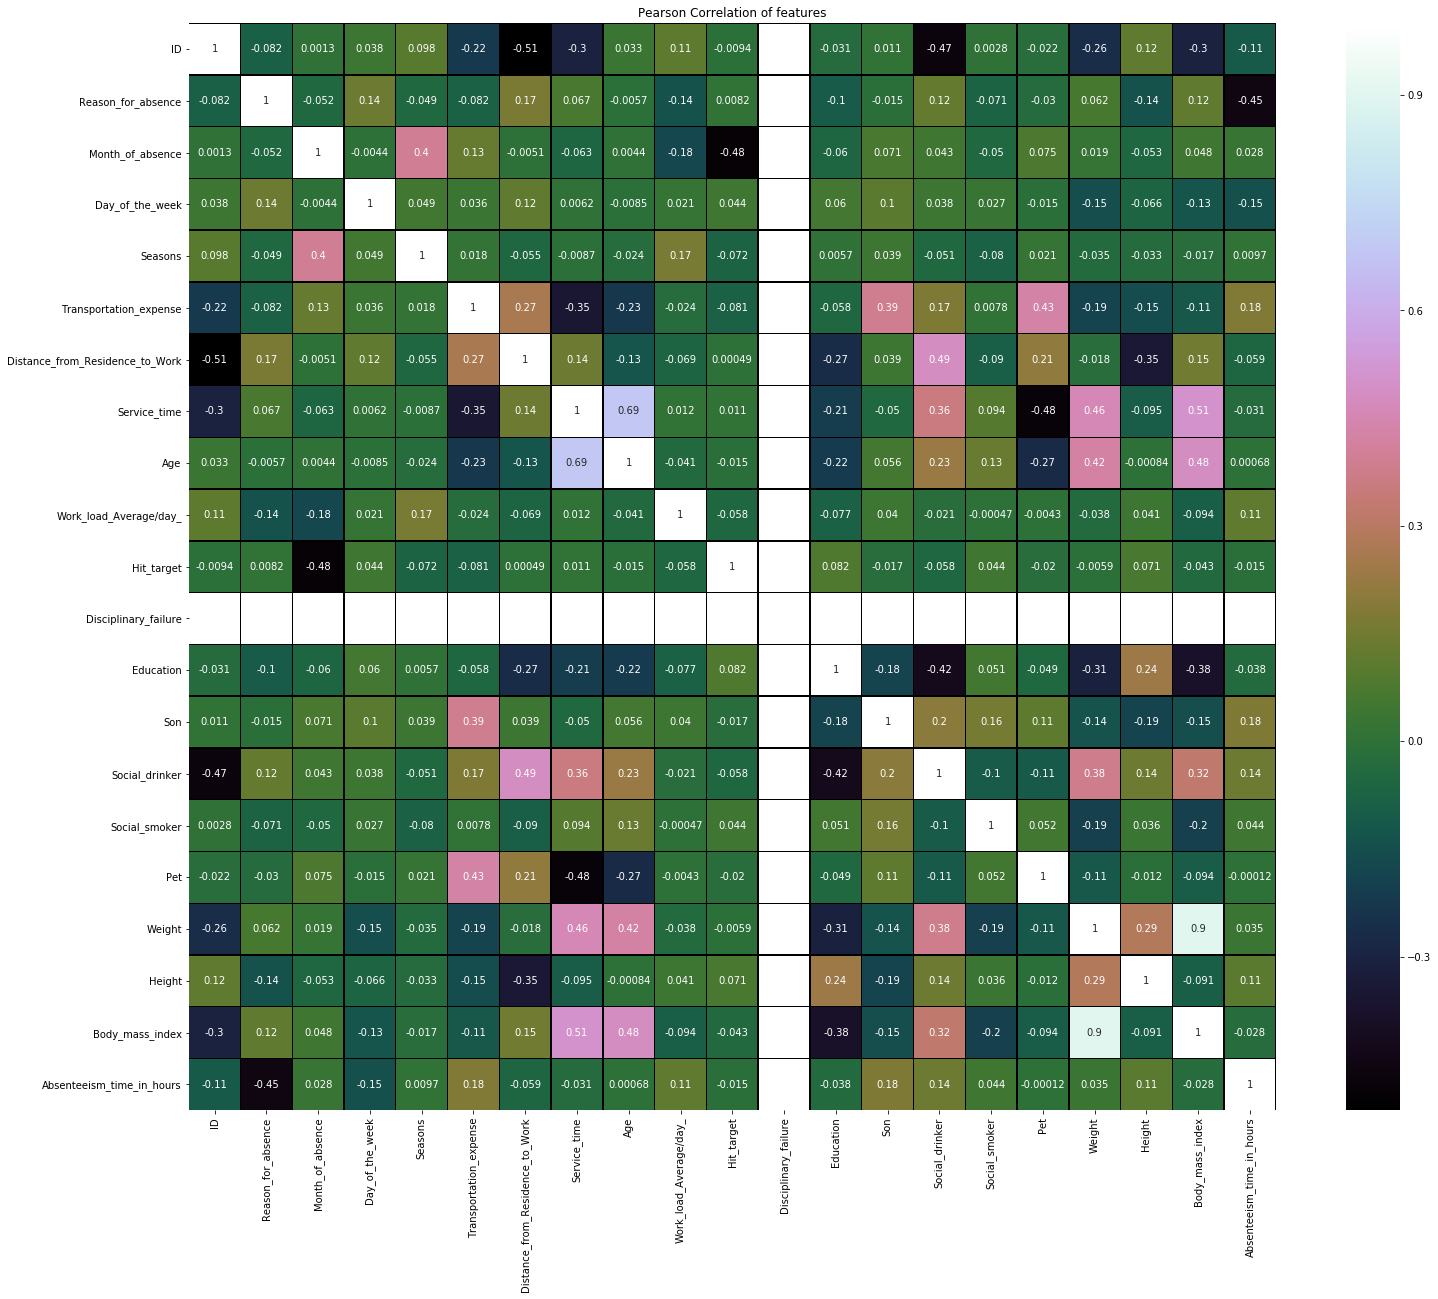

In [24]:
#Correlation Plot
churn_corr =absenteism_data
#Setting the plot height and width
f, ax = plt.subplots(figsize=(25, 20))

#Generating correlation matrix
corr = churn_corr.corr()

#Ploting using seaborn library
#annot shows the correlation number inside each block
plt.title('Pearson Correlation of features')
correlation_plot = sns.heatmap(corr, linewidths=0.4,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
plt.savefig("correlation_plot.png")
#BMI formula
#(Weight/(Height)2) *703
#A normal BMI ranges from 18.5 to 24.9
#Overweight is defined as having a BMI of 25 to 29.9.
#A BMI equal or greater than 30 is considered obese.

It cleary shows that Disciplinary failure is having only(no=0) for all the observations.As per my findings,Disciplinary failure having (yes=1) are with the observations of invalid input data(i.e. data with absenteeism_time_in_hours =0).
so we will consider the disciplinary failure feature here

In [25]:
absenteism_data = absenteism_data.drop(['Disciplinary_failure'],axis=1)

So again we visualise correlation plot with out Disciplinary_failure

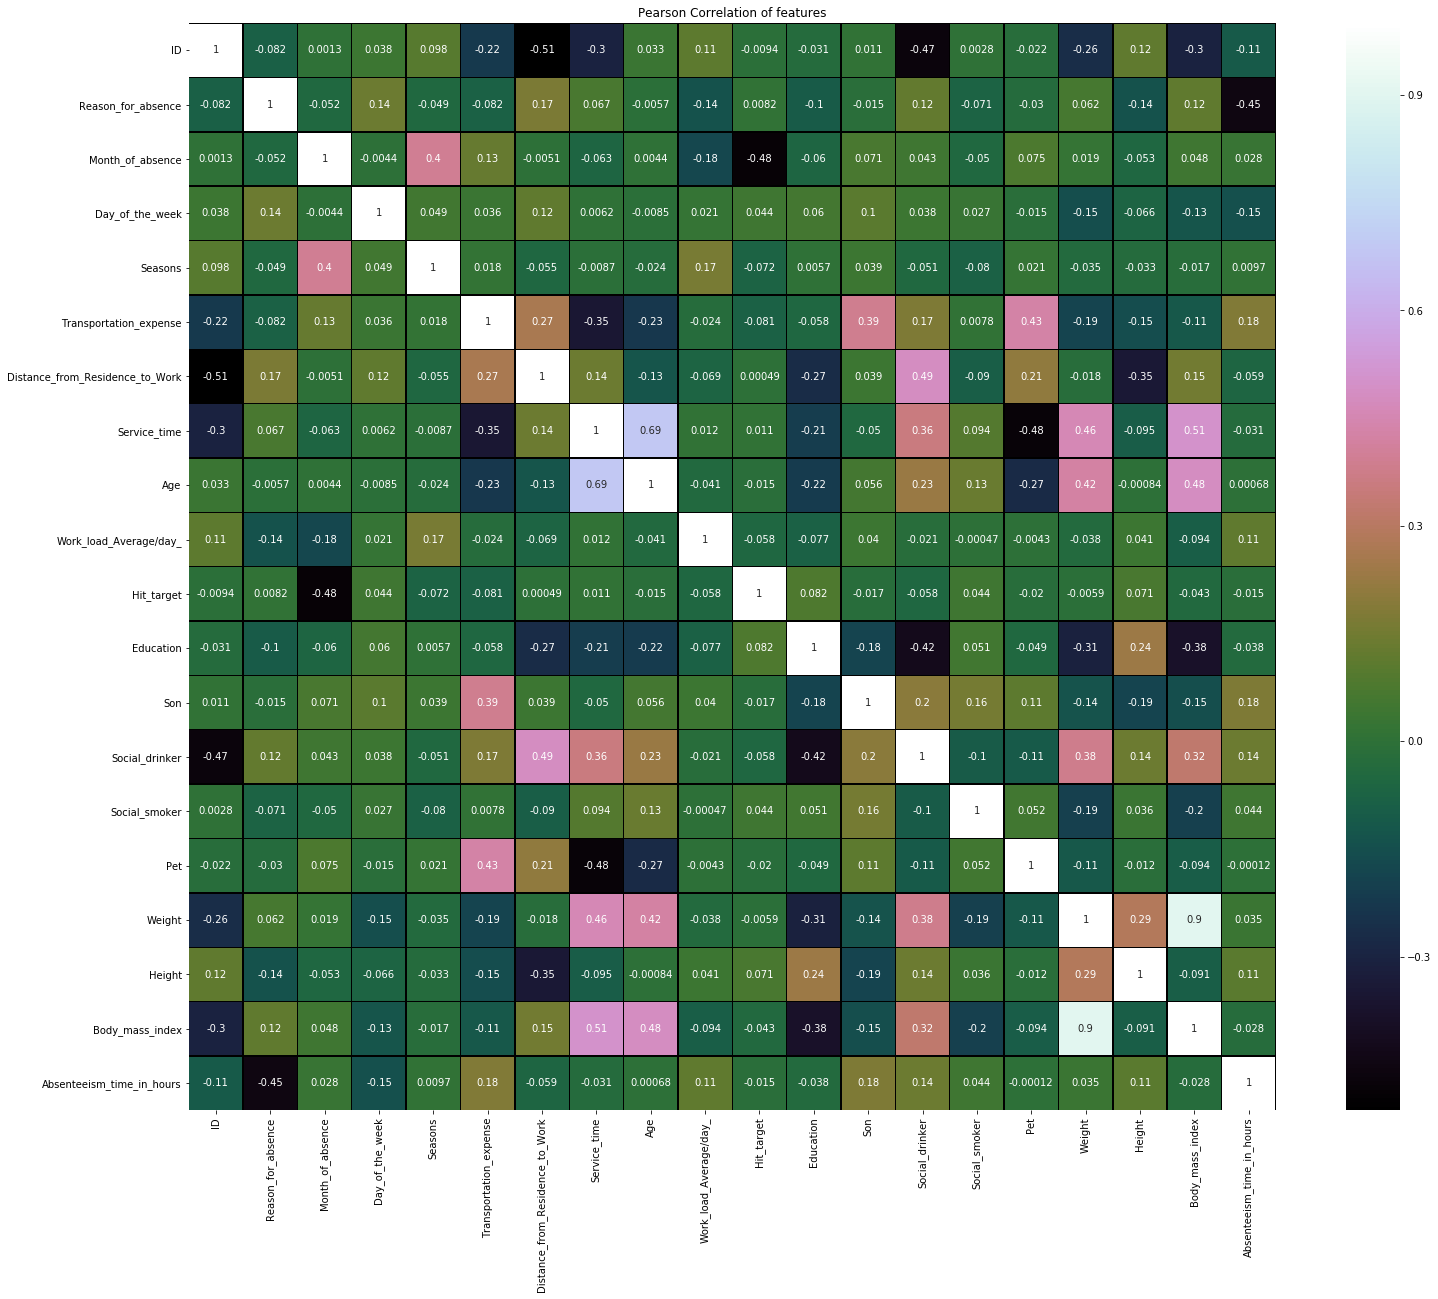

In [26]:
#Correlation Plot
churn_corr =absenteism_data
#Setting the plot height and width
f, ax = plt.subplots(figsize=(25, 20))

#Generating correlation matrix
corr = churn_corr.corr()

#Ploting using seaborn library
#annot shows the correlation number inside each block
plt.title('Pearson Correlation of features')
correlation_plot = sns.heatmap(corr, linewidths=0.4,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
plt.savefig("correlation_plot.png")
#BMI formula
#(Weight/(Height)2) *703
#A normal BMI ranges from 18.5 to 24.9
#Overweight is defined as having a BMI of 25 to 29.9.
#A BMI equal or greater than 30 is considered obese.

# Feature importance merging 3 techinques

Stability Selection via Randomized Lasso

In [27]:
# First extract the target variable which is our Absenteeism hours
Y = absenteism_data.Absenteeism_time_in_hours.values
# Drop Absenteeism_time_in_hours from the complete_data dataframe and create a matrix out of the house data
data_without_target = absenteism_data.drop(['Absenteeism_time_in_hours'], axis=1)
X = data_without_target.values
# Store the column/feature names into a list "colnames"
colnames = data_without_target.columns

In [28]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [29]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

C:\Users\chash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\chash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Memory is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\chash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\chash\Anaconda3\lib\site-packages\sklearn\utils\depre

finished


C:\Users\chash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\chash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\chash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, cat

# 2. Recursive Feature Elimination ( RFE )

In [30]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


# 3. Linear Model Feature Ranking

In [31]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [32]:
np.abs(lr.coef_)

array([6.67342176e-02, 2.67025528e-01, 5.60678879e-03, 2.58373655e-01,
       7.30207067e-03, 4.94401128e-03, 3.93668637e-02, 9.85918084e-02,
       2.09505207e-03, 7.18596816e-03, 1.47217729e-02, 3.78703447e-01,
       4.72320014e-01, 1.36700694e+00, 2.27796232e-01, 2.36225013e-01,
       5.57113600e-04, 3.98203114e-02, 1.01773365e-02])

# 4. Random Forest feature ranking

In [33]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50


building tree 9 of 50building tree 10 of 50

building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50building tree 18 of 50

building tree 19 of 50
building tree 20 of 50
building tree 21 of 50building tree 22 of 50

building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50building tree 28 of 50

building tree 29 of 50
building tree 30 of 50
building tree 31 of 50building tree 32 of 50

building tree 33 of 50
building tree 34 of 50
building tree 35 of 50building tree 36 of 50

building tree 37 of 50building tree 38 of 50

building tree 39 of 50building tree 40 of 50

building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


# 6. Creating the Feature Ranking Matrix

In [34]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	rlasso/Stability	Mean
ID	0.07	0.05	0.08	0.56	0.05	0.0	0.14
Reason_for_absence	0.26	0.2	1.0	0.83	0.22	1.0	0.59
Month_of_absence	0.0	0.0	0.15	0.17	0.0	0.0	0.05
Day_of_the_week	0.23	0.19	0.16	0.89	0.21	0.0	0.28
Seasons	0.0	0.0	0.06	0.39	0.0	0.0	0.08
Transportation_expense	0.01	0.0	0.07	0.11	0.0	0.0	0.03
Distance_from_Residence_to_Work	0.03	0.03	0.07	0.5	0.03	0.0	0.11
Service_time	0.07	0.07	0.03	0.67	0.08	0.0	0.15
Age	0.0	0.0	0.05	0.06	0.0	0.0	0.02
Work_load_Average/day_	0.01	0.0	0.21	0.22	0.0	0.0	0.07
Hit_target	0.01	0.01	0.15	0.28	0.01	0.0	0.08
Education	0.31	0.28	0.02	0.61	0.33	0.0	0.26
Son	0.47	0.35	0.03	0.94	0.39	0.01	0.36
Social_drinker	1.0	1.0	0.04	1.0	1.0	0.0	0.67
Social_smoker	0.0	0.17	0.0	0.78	0.14	0.0	0.18
Pet	0.19	0.17	0.01	0.72	0.2	0.0	0.22
Weight	0.0	0.0	0.06	0.0	0.0	0.0	0.01
Height	0.06	0.03	0.02	0.44	0.04	0.0	0.1
Body_mass_index	0.0	0.01	0.04	0.33	0.01	0.0	0.06


In [35]:
ranks.keys()

dict_keys(['rlasso/Stability', 'RFE', 'LinReg', 'Ridge', 'Lasso', 'RF', 'Mean'])

In [36]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

<Figure size 1800x2160 with 0 Axes>

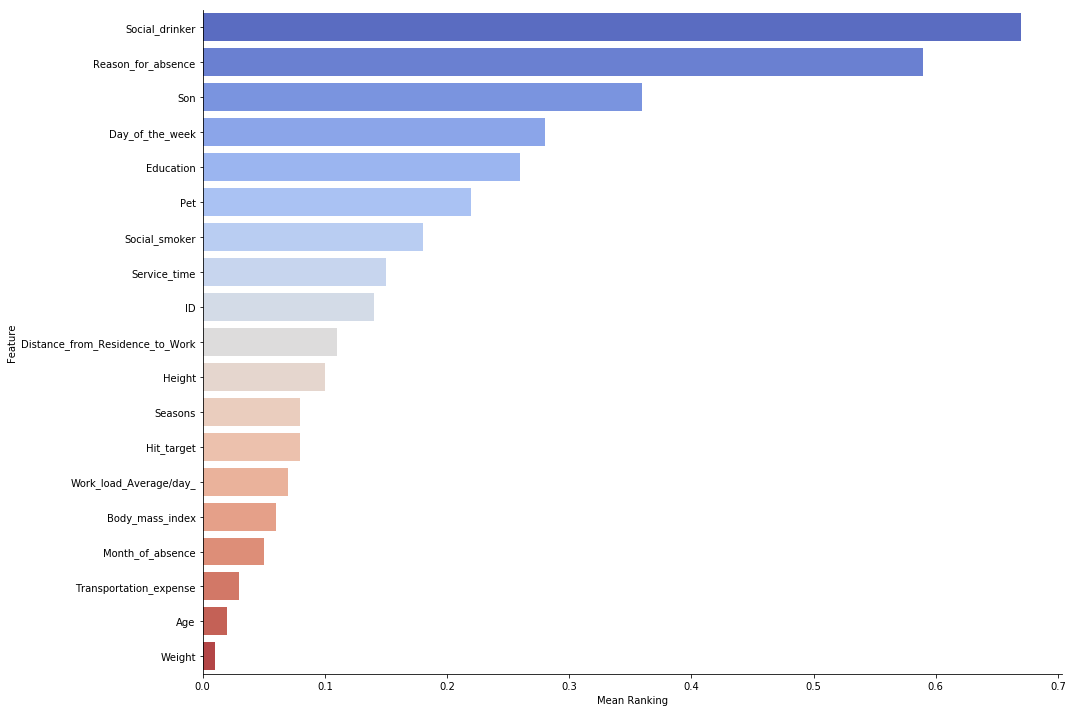

In [37]:
# Let's plot the ranking of the features
plt.figure(figsize=(25,30))
sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               height=10, aspect=1.5, palette='coolwarm')
plt.savefig('feature_importance.png')

Used the scores of stability selection via Randomized lasso Method,Recursive featute elimination,linear model future coefficients(Linear Regression,Lasso and Ridge) and random forest feature selection to come with the above ranking.The mean of the scores is used to rank the features.
# So our major drivers of absenteeism are Social drinker,Reason of absense,son,day of the week and education


# Predictive Models

In [38]:
categorical_vars = ['Reason_for_absence','Month_of_absence','Day_of_the_week',
                     'Seasons','Education','Social_drinker',
                     'Social_smoker', 'Pet', 'Son','ID']
# Get dummy variables for categorical variables
absenteism_data = pd.get_dummies(data = absenteism_data, columns = categorical_vars)

# Copying dataframe
absenteism_data1 = absenteism_data.copy()

In [39]:
absenteism_data.iloc[:,9].head()

0    4.0
2    2.0
3    4.0
4    2.0
5    2.0
Name: Absenteeism_time_in_hours, dtype: float64

In [40]:
absenteism_data.iloc[:,absenteism_data.columns != 'Absenteeism_time_in_hours'].head(1)

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Weight,Height,Body_mass_index,Reason_for_absence_1,...,ID_26,ID_27,ID_28,ID_29,ID_30,ID_31,ID_32,ID_33,ID_34,ID_36
0,289.0,36.0,13.0,33.0,239.554,97.0,90.0,172.0,30.0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(absenteism_data.iloc[:,absenteism_data.columns != 'Absenteeism_time_in_hours'],absenteism_data.iloc[:,9],test_size = 0.20)

# Decision Tree

In [42]:
# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 4.007941738042498
Root Mean Squared Error For Test data = 3.9544936519840177
R^2 Score(coefficient of determination) = 0.12740970949013375


# Random Forest


In [43]:
# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 1.4924091541441404
Root Mean Squared Error For Test data = 3.461636046101855
R^2 Score(coefficient of determination) = 0.3313614379498746


# Linear Regression

In [44]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 3.0763774252700493
Root Mean Squared Error For Test data = 3.8815537004536873
R^2 Score(coefficient of determination) = 0.1593023981212952


# Dimensionality Reduction using PCA

In [45]:
target = absenteism_data['Absenteeism_time_in_hours']

In [46]:
absenteism_data.drop(['Absenteeism_time_in_hours'], inplace = True, axis=1)
absenteism_data.shape

(696, 109)

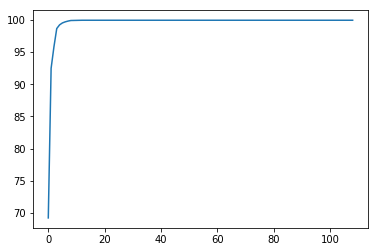

In [47]:
from sklearn.decomposition import PCA

# Converting data to numpy array
X = absenteism_data1.values

# Data has 109 variables so no of components of PCA = 109
pca = PCA(n_components=109)
pca.fit(X)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [48]:
# From the above plot selecting 10 components since it explains almost 95+ % data variance
pca = PCA(n_components=10)

# Fitting the selected components to the data
pca.fit(X)

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2)

# Decision Tree

In [49]:
# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.42373156661245137
Root Mean Squared Error For Test data = 0.4510793472403822
R^2 Score(coefficient of determination) = 0.9885971953224831


# Random Forest

In [50]:
# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.0016793284029313516
Root Mean Squared Error For Test data = 0.08452928486625212
R^2 Score(coefficient of determination) = 0.999599575918386


So based on the above predicted models,the best model will be the Random forest or Decision tree with good R^2 Score

# KMeans Clustering

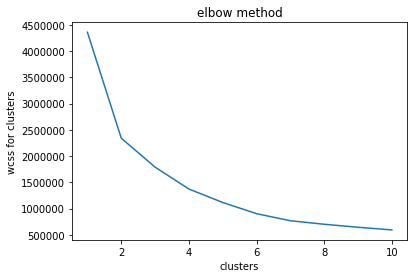

In [51]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(absenteism_data.iloc[:,absenteism_data.columns != 'ID'].values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('clusters')
plt.ylabel('wcss for clusters')
plt.show()

As per the above cluster diagram,we can say that only 2 clusters are possible for this data.As so many attributes are there and only 2 clusters are preferable.so we cant do clustering for this problem set